In [1]:
using LinearAlgebra
dot2(x) = dot(x, x)
using Distributions
using Plots
default(fmt=:png, titlefontsize=10)

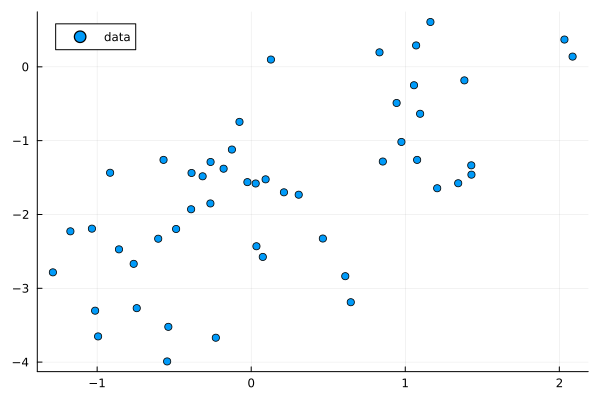

In [2]:
x = randn(50)
y = @.(-2 + x + randn())
scatter(x, y; label="data")

In [3]:
X = x .^ (0:1)'

50×2 Matrix{Float64}:
 1.0  -1.2873
 1.0  -0.915839
 1.0   0.943855
 1.0   0.0339713
 1.0   0.975008
 1.0   1.07704
 1.0  -0.537872
 1.0   1.05673
 1.0   0.854321
 1.0  -0.1253
 1.0   0.832765
 1.0   0.646261
 1.0  -0.743061
 ⋮    
 1.0   1.16329
 1.0  -0.315314
 1.0   2.03319
 1.0  -0.229662
 1.0  -0.487464
 1.0   1.07056
 1.0  -1.01311
 1.0   2.08619
 1.0  -0.858356
 1.0  -0.762868
 1.0   0.128005
 1.0   1.42962

In [4]:
β = X \ y

2-element Vector{Float64}:
 -1.8115657389883735
  0.8496046397276793

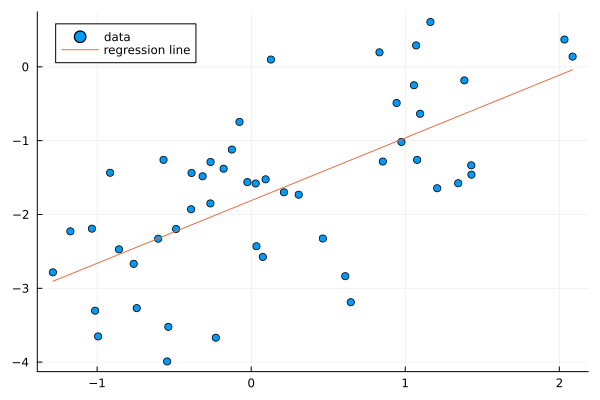

In [5]:
plot!(x -> evalpoly(x, β); label="regression line")

In [6]:
# R²の不適切な解釈はよく見る

function show_R²(; β = Float64[-2, 1], σₓ = 1.0, n = 1000)
    @show n
    @show σₓ
    # x = σₓ * randn(n)
    distx = Uniform(-√3*σₓ, √3*σₓ)
    x = rand(distx, n)
    @show var(x)
    y = @. evalpoly(x, (β,)) + randn()
    @show ȳ = mean(y)
    @show β
    @show β̂ = (x .^ (0:1)') \ y
    ŷ = @. evalpoly(x, (β̂,))
    @show R² = β[2]^2*var(distx) / (β[2]^2*var(distx) + 1)
    @show R̂² = dot2(ŷ .- ȳ) / dot2(y .- ȳ)
    @show 1 - dot2(y - ŷ) / dot2(y .- ȳ)
    @show cor(x, y)^2
    plot()
    scatter(x, y; label="data", msc=:auto, ms=2, alpha=0.5)
    plot!(x -> evalpoly(x, β̂), extrema(x)...; label="")
    title!("true model: y = -2 + x + randn(),   sample size: $n")
end

show_R² (generic function with 1 method)

n = 1000
σₓ = 1.0
var(x) = 0.9899090180798826
ȳ = mean(y) = -2.006163900121141
β = [-2.0, 1.0]
β̂ = x .^ (0:1)' \ y = [-1.9649594514025228, 1.0011941220010834]
R² = (β[2] ^ 2 * var(distx)) / (β[2] ^ 2 * var(distx) + 1) = 0.49999999999999994
R̂² = dot2(ŷ .- ȳ) / dot2(y .- ȳ) = 0.48045227965407594
1 - dot2(y - ŷ) / dot2(y .- ȳ) = 0.480452279654075
cor(x, y) ^ 2 = 0.48045227965407494


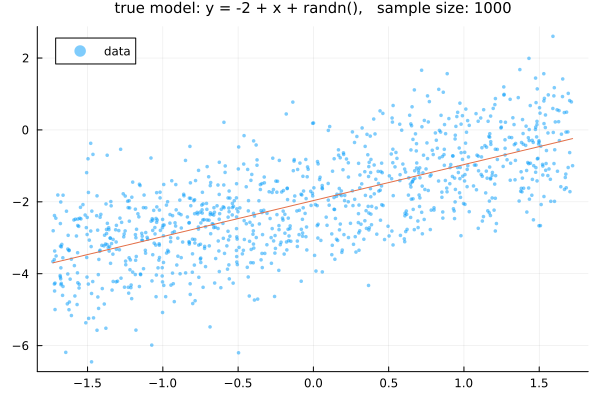

In [7]:
show_R²(σₓ = 1.0)

n = 1000
σₓ = 10.0
var(x) = 99.59165679236102
ȳ = mean(y) = -2.107265229247012
β = [-2.0, 1.0]
β̂ = x .^ (0:1)' \ y = [-2.033047222783127, 1.0015637233346633]
R² = (β[2] ^ 2 * var(distx)) / (β[2] ^ 2 * var(distx) + 1) = 0.9900990099009901
R̂² = dot2(ŷ .- ȳ) / dot2(y .- ȳ) = 0.9893567212608549
1 - dot2(y - ŷ) / dot2(y .- ȳ) = 0.9893567212608545
cor(x, y) ^ 2 = 0.9893567212608545


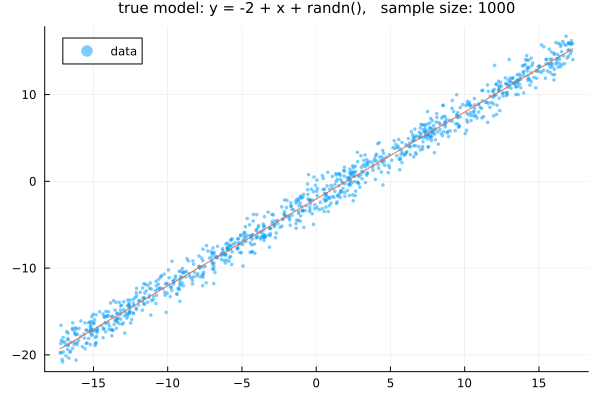

In [8]:
show_R²(σₓ = 10.0)

n = 1000
σₓ = 0.1
var(x) = 0.009887358183630603
ȳ = mean(y) = -1.9972567306855857
β = [-2.0, 1.0]
β̂ = x .^ (0:1)' \ y = [-1.9964451190381198, 1.240376923589575]
R² = (β[2] ^ 2 * var(distx)) / (β[2] ^ 2 * var(distx) + 1) = 0.009900990099009901
R̂² = dot2(ŷ .- ȳ) / dot2(y .- ȳ) = 0.014687357418644062
1 - dot2(y - ŷ) / dot2(y .- ȳ) = 0.014687357418643465
cor(x, y) ^ 2 = 0.01468735741864405


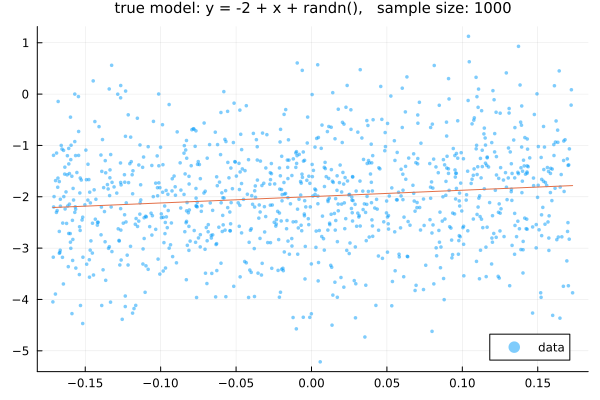

In [9]:
show_R²(σₓ = 0.1)